# Data Understanding

Data understanding is the preliminary investigation of the data in order to better understand their specific characteristics. Data understanding consists of describing, exploring, and and identifying problems with the data.

## Summary Statistics

Summary statistics are the numbers that summarize properties of the data. Summarized properties include frequency, location, and spread. Most summary statistics can be calculated in a single pass through the data. There are many ways to obtain summary statistics for your data in Python.

Below, we will demonstrate how to obtain summary statistics using pandas and NumPy. First, we import both of these libraries:

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Magic command required for showing plots in notebook.
%matplotlib inline

Next, we generate two illustrative datasets from which we can generate summary statistics:

In [3]:
# NumPy ndarray of 10,000 random numbers in range [0-500).
npvalues = np.random.randint(500, size=10000)

# pandas Series of 10,000 random numbers in range [0-500).
pdvalues = pd.Series(np.random.randint(500, size=10000))

NumPy provides an *n*-dimensional array (`ndarray`) object that is a multidimensional container of items of the same type and size. Below, we show the first 10 elements represented as an `ndarray`, which is the default output of the above `nd.random.randint()` function.

In [4]:
npvalues[:10]

array([328, 359,  80,  83, 161, 318, 466, 308, 476, 383])

pandas Series are implemented as labeled `ndarrays`. Therefore, all of the statistical methods available to `ndarrays` can also be used with pandas `Series`. pandas `Series` also provide additional functionality, as we will show. Below, we show the first 10 elements represented as a pandas `Series`. We generated this representation by converting the default `ndarray` to a `Series` with the above `pd.Series()` function.

In [5]:
pdvalues[:10]

0     32
1    137
2    346
3    116
4    314
5    122
6    490
7    395
8     60
9    407
dtype: int64

Built-in methods are available for basic statistics. Some are demonstrated below:

In [6]:
print("MIN(npvalues) = {0: <25} MIN(pdvalues) = {1}".format(npvalues.min(), pdvalues.min()))  # minimum
print("MAX(npvalues) = {0: <25} MAX(pdvalues) = {1}".format(npvalues.max(), pdvalues.max()))  # maximum
print("RANGE(npvalues) = {0: <23} RANGE(pdvalues) = {1}".format(npvalues.ptp(), np.ptp(pdvalues)))  # range
print("MEAN(npvalues) = {0: <24} MEAN(pdvalues) = {1}".format(npvalues.mean(), pdvalues.mean()))  # mean
print("STD(npvalues) = {0: <25} STD(pdvalues) = {1}".format(npvalues.std(), pdvalues.std()))  # standard deviation
print("VARIANCE(npvalues) = {0: <20} VARIANCE(pdvalues) = {1}".format(npvalues.var(), pdvalues.var()))  # variance

MIN(npvalues) = 0                         MIN(pdvalues) = 0
MAX(npvalues) = 499                       MAX(pdvalues) = 499
RANGE(npvalues) = 499                     RANGE(pdvalues) = 499
MEAN(npvalues) = 248.0512                 MEAN(pdvalues) = 249.8061
STD(npvalues) = 143.64049491198503        STD(pdvalues) = 143.8454401566327
VARIANCE(npvalues) = 20632.59177856       VARIANCE(pdvalues) = 20691.5106538554


Additionally, pandas `Series` have a method called `describe()` that returns a convenient summary of these basic statistics.

In [7]:
pdvalues.describe()

count    10000.00000
mean       249.80610
std        143.84544
min          0.00000
25%        125.00000
50%        250.00000
75%        373.00000
max        499.00000
dtype: float64

For non-numerical series objects, `describe()` will return a simple summary of the number of unique values and most frequently occurring ones.

In [8]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])

In [9]:
s

0      a
1      a
2      b
3      b
4      a
5      a
6    NaN
7      c
8      d
9      a
dtype: object

In [10]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

*np.nan* is used to denote missing values. By default, the statistical methods implemented in pandas (both for a  `Series` and `DataFrame`) skip these values, which is not always the case when we are dealing with an `ndarray`. This behavior can be altered by including the *skipna=False* flag when calling a method.

## Handling missing data with pandas

pandas provides extensive support for missing data. For full documentation, [consult this webpage](http://pandas-docs.github.io/pandas-docs-travis/).

Below are a few examples of how to work with missing data using pandas. First, we create a pandas `DataFrame` with 5 rows and 3 columns. We then fill the `DataFrame` with random numbers:

In [11]:
df = pd.DataFrame(np.random.randn(5, 3),
                  index=['a', 'c', 'e', 'f', 'h'],
                  columns=['one', 'two', 'three'])
df

,one,two,three
a,1.123648,0.185360,-0.191480
c,0.789982,0.214314,-0.561218
e,2.152077,-1.528424,0.742489
f,-0.086604,0.375175,3.152477
h,0.009055,0.621679,0.148283


Next, we add two more columns, named 'four' and 'five':

In [12]:
df['four'] = 'bar'
df['five'] = df['one'] > 0
df

,one,two,three,four,five
a,1.123648,0.185360,-0.191480,bar,True
c,0.789982,0.214314,-0.561218,bar,True
e,2.152077,-1.528424,0.742489,bar,True
f,-0.086604,0.375175,3.152477,bar,False
h,0.009055,0.621679,0.148283,bar,True


Adding new rows is also simple. Below we include three extra empty rows:

In [13]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,1.123648,0.185360,-0.191480,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.789982,0.214314,-0.561218,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,2.152077,-1.528424,0.742489,bar,True
f,-0.086604,0.375175,3.152477,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,0.009055,0.621679,0.148283,bar,True


In [14]:
# This is one way to index a column in pandas.
df2['one']

a    1.123648
b         NaN
c    0.789982
d         NaN
e    2.152077
f   -0.086604
g         NaN
h    0.009055
Name: one, dtype: float64

In [15]:
# This is one way to index a row in pandas.
df2.loc['a']

one      1.123648
two       0.18536
three    -0.19148
four          bar
five         True
Name: a, dtype: object

pandas has two functions, `isnull()` and `notnull()`, that return boolean objects when called:

In [16]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [17]:
pd.notnull(df2['one'])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

Missing values propagate naturally through arithmetic operations between pandas objects.

In [18]:
a = df[['one', 'two']].copy()
a['one']['a':'e'] = float('nan')
a

,one,two
a,NaN,0.185360
c,NaN,0.214314
e,NaN,-1.528424
f,-0.086604,0.375175
h,0.009055,0.621679


In [19]:
b = df[['one', 'two', 'three']]
b

,one,two,three
a,1.123648,0.185360,-0.191480
c,0.789982,0.214314,-0.561218
e,2.152077,-1.528424,0.742489
f,-0.086604,0.375175,3.152477
h,0.009055,0.621679,0.148283


In [20]:
a + b

,one,three,two
a,NaN,NaN,0.370719
c,NaN,NaN,0.428628
e,NaN,NaN,-3.056849
f,-0.173207,NaN,0.750349
h,0.018111,NaN,1.243358


In [21]:
a = a['one'].dropna()
a

f   -0.086604
h    0.009055
Name: one, dtype: float64

In pandas, summary statistics all account for missing values. 
*   When summing data, `NaN` (missing) values will be treated as zero.
*   If the data are all `NaN`, the result will be `NaN`.
*   Methods like `cumsum()` and `cumprod()` ignore `NaN` values, but preserve them in the resulting arrays.

*This is just the bare minimum. pandas has more functionality for working with missing data.*

## Histograms

### Using pandas

Plotting histograms using pandas is quite straightforward. Using the above pandas `Series`, we can simply call the `hist()` method.

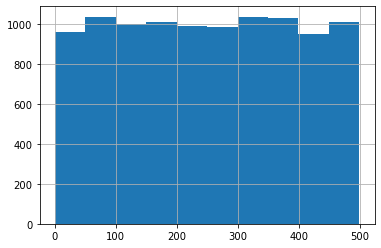

In [22]:
pdhist = pdvalues.hist()

Parameters can be used to change the number of bins, color, transparency, etc.

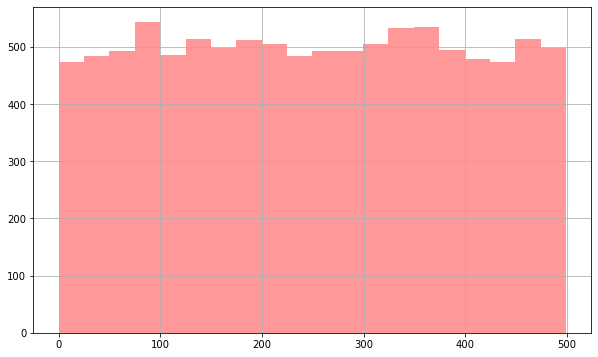

In [23]:
pdhist2 = pdvalues.hist(bins=20, color='r', alpha=0.4, figsize=(10, 6))

### Using NumPy + Matplotlib

pandas can produce visualizations directly by using or "wrapping" matplotlib, a popular plotting library for Python. This means that when we plot a histogram using pandas, pandas is actually using the `hist()` method of matplotlib to produce this plot. We can of course achieve the same result by performing that call on our `ndarray` directly from matplotlib.

To do this, we first have to import matplotlib.

In [24]:
import matplotlib.pyplot as plt  # required for plotting

Next, we call the `hist()` method of matplotlib, with our `ndarray` as input:

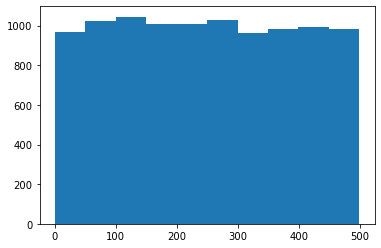

In [25]:
nphist = plt.hist(npvalues)

## Boxplots

### Using pandas

The pandas `DataFrame` has a boxplot method that allows you to visualize the distribution of values within each column.

In [26]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['Col1', 'Col2'])
df.head()

,Col1,Col2
0,0.345656,0.153999
1,0.432350,0.888185
2,0.456919,0.691059
3,0.522067,0.035179
4,0.089274,0.281409


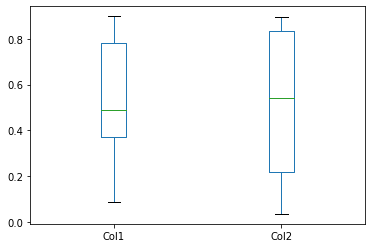

In [27]:
box = df.boxplot(grid=False)

### Using NumPy + Matplotlib

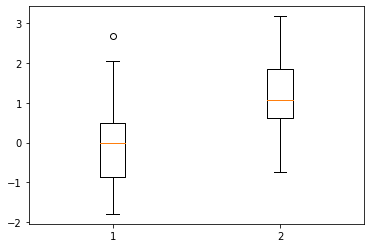

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = np.random.normal(0, 1, 50)
x2 = np.random.normal(1, 1, 50)

npbox = ax.boxplot([x1, x2])

## Scatterplots

### Using pandas

Let's define a `DataFrame` containing 2 columns, each with 200 random numbers < 1.

In [29]:
df = pd.DataFrame(np.random.rand(200, 2))

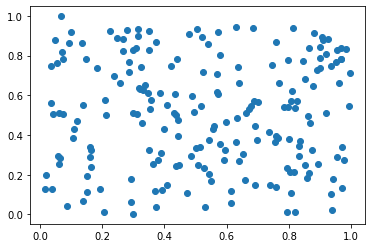

In [30]:
pdscatter = plt.scatter(df[0], df[1])

### Using NumPy + Matplotlib

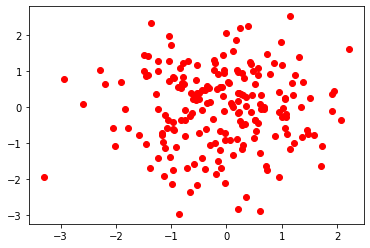

In [31]:
x = np.random.randn(200)
y = np.random.randn(200)

fig = plt.figure()
ax = fig.add_subplot(111)

npscatter = ax.scatter(x, y, color='r')